In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import pandas as pd

model_df = pd.read_csv(r'data\Scrape-details-from-partselect.com--7--2025-04-15.csv')

In [3]:
for x, i in enumerate(model_df.columns):
    print(x, i)
# print(model_df.columns)

0 nf__links href
1 breadcrumbs
2 title-main
3 bold
4 bold href
5 mega-m__part__img href
6 d-flex
7 mb-1
8 d-flex (2)
9 mega-m__part__price
10 bold (2)
11 bold href (2)
12 mega-m__part__img href (2)
13 d-flex (3)
14 mb-1 (2)
15 d-flex (4)
16 mega-m__part__price (2)
17 bold (3)
18 bold href (3)
19 mega-m__part__img href (3)
20 d-flex (5)
21 mb-1 (3)
22 d-flex (6)
23 mega-m__part__price (3)
24 bold (4)
25 bold href (4)
26 mega-m__part__img href (4)
27 d-flex (7)
28 mb-1 (4)
29 d-flex (8)
30 mega-m__part__price (4)
31 bold (5)
32 bold href (5)
33 mega-m__part__img href (5)
34 d-flex (9)
35 mb-1 (5)
36 d-flex (10)
37 mega-m__part__price (5)
38 bold (6)
39 bold href (6)
40 mega-m__part__img href (6)
41 d-flex (11)
42 mb-1 (6)
43 d-flex (12)
44 mega-m__part__price (6)
45 bold (7)
46 bold href (7)
47 mega-m__part__img href (7)
48 d-flex (13)
49 mb-1 (7)
50 d-flex (14)
51 mega-m__part__price (7)
52 bold (8)
53 bold href (8)
54 mega-m__part__img href (8)
55 d-flex (15)
56 mb-1 (8)
57 d-flex (16)

In [42]:
# Get all columns that contain 'd-flex' in their name
df_dflex_cols = model_df.columns[model_df.columns.str.contains('d-flex')].tolist()

# Add 'nf_links' and 'breadcrumbs' explicitly
selected_cols = ['nf__links href', 'breadcrumbs'] + df_dflex_cols 

# Select those columns from the DataFrame
df_selected = model_df[selected_cols]
df_selected.head()

,nf__links href,breadcrumbs,d-flex,d-flex (2),d-flex (3),d-flex (4),d-flex (5),d-flex (6),d-flex (7),d-flex (8),...,d-flex (15),d-flex (16),d-flex (17),d-flex (18),d-flex (19),d-flex (20),d-flex (21),d-flex (22),d-flex (23),d-flex (24)
0,https://www.partselect.com/Models/LFSS2612TF0/,LFSS2612TF0,PartSelect #: PS2358880,Crisper Cover Support - Front\n★★★★★\n★★★★★\n(...,PartSelect #: PS2358879,Crisper Support - Rear\n★★★★★\n★★★★★\n(21)\nPa...,PartSelect #: PS12364199,Refrigerator Door Shelf Bin\n★★★★★\n★★★★★\n(13...,PartSelect #: PS430027,Door Shelf\n★★★★★\n★★★★★\n(89)\nPartSelect #: ...,...,PartSelect #: PS3412266,Refrigerator Water Filter\n★★★★★\n★★★★★\n(58)\...,PartSelect #: PS2363832,Refrigerator Shelf Frame (Glass not included)\...,PartSelect #: PS2361214,Refrigerator Crisper Drawer\n★★★★★\n★★★★★\n(29...,PartSelect #: PS469522,Defrost Thermostat Kit\n★★★★★\n★★★★★\n(27)\nPa...,PartSelect #: PS2361213,Crisper Drawer Cover - NO Glass\n★★★★★\n★★★★★\...
1,https://www.partselect.com/Models/FGHS2631PF4A/,FGHS2631PF4A,PartSelect #: PS429725,Bottom Door Bin\n★★★★★\n★★★★★\n(134)\nPartSele...,PartSelect #: PS2358880,Crisper Cover Support - Front\n★★★★★\n★★★★★\n(...,PartSelect #: PS2358879,Crisper Support - Rear\n★★★★★\n★★★★★\n(21)\nPa...,PartSelect #: PS430027,Door Shelf\n★★★★★\n★★★★★\n(89)\nPartSelect #: ...,...,PartSelect #: PS2363832,Refrigerator Shelf Frame (Glass not included)\...,PartSelect #: PS1993820,Air Filter\n★★★★★\n★★★★★\n(24)\nPartSelect #: ...,PartSelect #: PS2361214,Refrigerator Crisper Drawer\n★★★★★\n★★★★★\n(29...,PartSelect #: PS469522,Defrost Thermostat Kit\n★★★★★\n★★★★★\n(27)\nPa...,PartSelect #: PS2361213,Crisper Drawer Cover - NO Glass\n★★★★★\n★★★★★\...
2,https://www.partselect.com/Models/ULTRAWF/,ULTRAWF,This part number matches the current model num...,"WATER FILTER,PS ULTRA SYSTEM\nThis part number...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.partselect.com/Models/WRS325FDAM04/,WRS325FDAM04,PartSelect #: PS11739119,Refrigerator Crisper Drawer with Humidity Cont...,PartSelect #: PS11752778,Refrigerator Door Shelf Bin\n★★★★★\n★★★★★\n(34...,PartSelect #: PS11701542,Refrigerator Ice and Water Filter\n★★★★★\n★★★★...,PartSelect #: PS11739042,Lower Door Closing Cam\n★★★★★\n★★★★★\n(94)\nPa...,...,PartSelect #: PS11751711,Refrigerator Shelf Frame with Glass\n★★★★★\n★★...,PartSelect #: PS11757044,Ice Bucket\n★★★★★\n★★★★★\n(67)\nPartSelect #: ...,PartSelect #: PS11731733,Refrigerator Shelf Glass\n★★★★★\n★★★★★\n(28)\n...,PartSelect #: PS11740301,Snack Pan - Clear\n★★★★★\n★★★★★\n(26)\nPartSel...,PartSelect #: PS11757021,Screw\n★★★★★\n★★★★★\n(3)\nPartSelect #: PS1175...
4,https://www.partselect.com/Models/WRS325FDAM02/,WRS325FDAM02,PartSelect #: PS11739119,Refrigerator Crisper Drawer with Humidity Cont...,PartSelect #: PS11752778,Refrigerator Door Shelf Bin\n★★★★★\n★★★★★\n(34...,PartSelect #: PS11701542,Refrigerator Ice and Water Filter\n★★★★★\n★★★★...,PartSelect #: PS11739042,Lower Door Closing Cam\n★★★★★\n★★★★★\n(94)\nPa...,...,PartSelect #: PS11750673,Bi-Metal Defrost Thermostat\n★★★★★\n★★★★★\n(29...,PartSelect #: PS11751711,Refrigerator Shelf Frame with Glass\n★★★★★\n★★...,PartSelect #: PS11757044,Ice Bucket\n★★★★★\n★★★★★\n(67)\nPartSelect #: ...,PartSelect #: PS4082908,Crisper Cover with Glass\n★★★★★\n★★★★★\n(23)\n...,PartSelect #: PS11731733,Refrigerator Shelf Glass\n★★★★★\n★★★★★\n(28)\n...


In [43]:
col_list = []

for i, col in enumerate(df_dflex_cols):

    df_selected[f'ps_codes{i}'] = model_df[col].str.findall(r'\bPS\d+\b')
    col_list.append(f'ps_codes{i}')

df_selected = df_selected.drop(columns=df_dflex_cols)
df_selected['All PS'] = df_selected[col_list].apply(lambda row: row.tolist(), axis=1)
df_selected = df_selected.drop(columns=col_list)
# for x, i in enumerate(df_selected.columns):
#     print(x, i)
df_selected['flattened_PS'] = df_selected['All PS'].apply(lambda ps_list: [ps for sublist in ps_list if isinstance(sublist, list) for ps in sublist])


df_selected.head(4)

C:\Users\shepa\AppData\Local\Temp\ipykernel_11792\1702234502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[f'ps_codes{i}'] = model_df[col].str.findall(r'\bPS\d+\b')
C:\Users\shepa\AppData\Local\Temp\ipykernel_11792\1702234502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[f'ps_codes{i}'] = model_df[col].str.findall(r'\bPS\d+\b')
C:\Users\shepa\AppData\Local\Temp\ipykernel_11792\1702234502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,nf__links href,breadcrumbs,All PS,flattened_PS,flattened_PS_str
0,https://www.partselect.com/Models/LFSS2612TF0/,LFSS2612TF0,"[[PS2358880], [PS2358880], [PS2358879], [PS235...","[PS2358880, PS2358880, PS2358879, PS2358879, P...","PS2358880, PS2358880, PS2358879, PS2358879, PS..."
1,https://www.partselect.com/Models/FGHS2631PF4A/,FGHS2631PF4A,"[[PS429725], [PS429725], [PS2358880], [PS23588...","[PS429725, PS429725, PS2358880, PS2358880, PS2...","PS429725, PS429725, PS2358880, PS2358880, PS23..."
2,https://www.partselect.com/Models/ULTRAWF/,ULTRAWF,"[[], [PS12366457], nan, nan, nan, nan, nan, na...",[PS12366457],PS12366457
3,https://www.partselect.com/Models/WRS325FDAM04/,WRS325FDAM04,"[[PS11739119], [PS11739119], [PS11752778], [PS...","[PS11739119, PS11739119, PS11752778, PS1175277...","PS11739119, PS11739119, PS11752778, PS11752778..."


In [48]:
G = nx.Graph()

# Add edges between models and their PS codes
for _, row in df_selected.iterrows():
    model = row['breadcrumbs']
    for ps_code in row['flattened_PS']:
        if ps_code != 'nan' and ps_code != []:
            # print(ps_code)
            G.add_edge(model, ps_code)

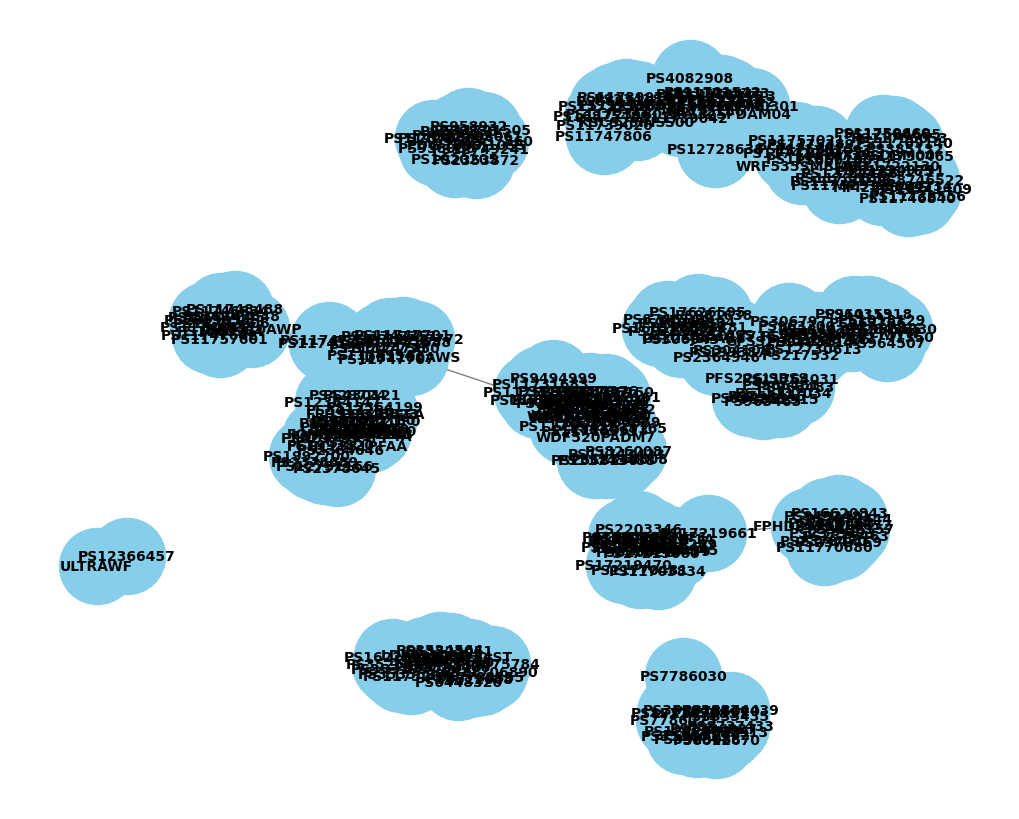

In [49]:
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

# Display the plot
plt.show()


In [54]:
import pickle

with open("model_parts_graph.gpickle", "wb") as f:
    pickle.dump(G, f)

In [114]:
df1 = model_df[model_df.columns[1:57]]
df2 = model_df[model_df.columns[57:]]
# df2 = model_df[model_df.columns[87:109]]
# df3 = model_df[model_df.columns[109:]]

In [96]:
# Create a list to store the new consolidated columns
consolidated_columns = []

# Loop through the columns in groups of 3
for i in range(0, len(df1.columns), 8):
    # Concatenate each group of 3 columns into one
    consolidated_columns.append(df1.iloc[:, i:i+8].apply(lambda x: list(x), axis=1))

# Create a new DataFrame with the consolidated columns
new_df = pd.DataFrame(consolidated_columns).T
new_df.columns = [f"Group_{i}" for i in range(len(consolidated_columns))]

flat_products = new_df.to_numpy().flatten()
flat_products = flat_products.tolist()
final_df1 = pd.DataFrame(flat_products, columns=['Product Name', 'site1', 'PS CODE', 'MANU CODE', 'site2', 'imageB64', 'price', 'In stock?'])
final_df1 = final_df1.drop(columns=['site2', 'imageB64'])
final_df1['PS CODE'] = final_df1['PS CODE'].str.replace('PartSelect Number ', '', regex=False)
final_df1['MANU CODE'] = final_df1['MANU CODE'].str.replace('Manufacturer Part Number ', '', regex=False)
final_df1['price'] = final_df1['price'].fillna('No Info')
final_df1['In stock?'] = final_df1['In stock?'].fillna('No Info')

final_df1.head()
final_df1.to_csv('part_info1.csv')

In [ ]:
df1 = pd.read_csv('part_info.csv', index_col=None)
df_other = pd.read_csv('part_info1.csv', index_col=None)
df = pd.concat((df1, df_other), axis=0)
df = df.drop(columns='Unnamed: 0')
# df.head(10)
# df.__len__

df['price'] = df['price'].fillna('No Info')
df['In stock?'] = df['In stock?'].fillna('No Info')
df['text body'] = df['text body'].fillna('No Info')
print(len(df))
df = df.drop_duplicates(subset='PS CODE', keep='first')
print(len(df))
df_clean = df.dropna(subset=['Product Name'])
df.to_csv('part_info_final.csv')

867
468


In [ ]:
# repair_stories = pd.concat([df3['repair-story'], df3['repair-story (2)'], df3['repair-story (3)']], axis=0, ignore_index=True)
# repair_stories = pd.DataFrame(repair_stories, columns=['repair-story'])
# repair_stories.head(5)
# repair_stories.to_csv("repair_stories.csv")

In [116]:
df2.head()
# Create a list to store the new consolidated columns
consolidated_columns = []

# Loop through the columns in groups of 3
for i in range(0, len(df2.columns), 8):
    # Concatenate each group of 3 columns into one
    consolidated_columns.append(df2.iloc[:, i:i+8].apply(lambda x: list(x), axis=1))

# Create a new DataFrame with the consolidated columns
new_df = pd.DataFrame(consolidated_columns).T
new_df.columns = [f"Group_{i}" for i in range(len(consolidated_columns))]

flat_products = new_df.to_numpy().flatten()
flat_products = flat_products.tolist()
final_df1 = pd.DataFrame(flat_products, columns=['Product Name', 'site1', 'PS CODE', 'MANU CODE', 'site2', 'imageB64', 'price', 'In stock?'])
final_df1 = final_df1.drop(columns=['site2', 'imageB64'])
final_df1['PS CODE'] = final_df1['PS CODE'].str.replace('PartSelect Number ', '', regex=False)
final_df1['MANU CODE'] = final_df1['MANU CODE'].str.replace('Manufacturer Part Number ', '', regex=False)
final_df1['price'] = final_df1['price'].fillna('No Info')
final_df1['In stock?'] = final_df1['In stock?'].fillna('No Info')

final_df1.head()
# final_df1.to_csv('part_info1.csv')

,Product Name,site1,PS CODE,MANU CODE,price,In stock?
0,Dishwasher Positioner,https://www.partselect.com/PS11750093-Whirlpoo...,PS11750093,WPW10195840,$32.89,In Stock
1,Dishwasher Dish Rack Slide Track - Right Side,https://www.partselect.com/PS12584377-Whirlpoo...,PS12584377,W11259786,$51.75,In Stock
2,Dishwasher Rack Roller Wheel,https://www.partselect.com/PS8727423-Bosch-006...,PS8727423,00611666,No Info,No Info
3,Dishwasher ROLLER CARRIER,https://www.partselect.com/PS16226065-GE-WD12X...,PS16226065,WD12X28078,No Info,No Info
4,Dishwasher Splash Shield Kit,https://www.partselect.com/PS2203346-Frigidair...,PS2203346,154701001,$13.67,In Stock


In [118]:
df1 = pd.read_csv('part_info_final.csv', index_col=None)
# df_other = pd.read_csv('part_info1.csv', index_col=None)
df = pd.concat((df1, final_df1), axis=0)
df = df.drop(columns='Unnamed: 0')
# df.head(10)
# df.__len__

df['price'] = df['price'].fillna('No Info')
df['In stock?'] = df['In stock?'].fillna('No Info')
df['text body'] = df['text body'].fillna('No Info')
print(len(df))
df = df.drop_duplicates(subset='PS CODE', keep='first')
print(len(df))
df_clean = df.dropna(subset=['Product Name'])
df.to_csv('part_info_final.csv')

866
468


In [ ]:
part_info_df = pd.read_csv(r'\data\part_info_final.csv')
PS_codes = set(part_info_df['PS CODE'].to_numpy())

In [56]:
print(PS_codes)

{nan, 'PS1993870', 'PS284555', 'PS11721490', 'PS3412266', 'PS12731165', 'PS16226065', 'PS1016368', 'PS11770483', 'PS12712096', 'PS11756470', 'PS2364946', 'PS2341896', 'PS11739970', 'PS11738607', 'PS17219715', 'PS1766247', 'PS11746840', 'PS12585690', 'PS11728912', 'PS17808084', 'PS12742479', 'PS285013', 'PS2003478', 'PS11738151', 'PS11750093', 'PS7786020', 'PS12727331', 'PS12703061', 'PS11743423', 'PS7786030', 'PS11740365', 'PS11756056', 'PS2356327', 'PS8737453', 'PS11769140', 'PS12749241', 'PS16660783', 'PS260801', 'PS12075784', 'PS17219603', 'PS430027', 'PS11770481', 'PS16745479', 'PS7788355', 'PS11757048', 'PS17800259', 'PS11739042', 'PS1020205', 'PS1964356', 'PS10065979', 'PS12741350', 'PS11728916', 'PS16221228', 'PS11747750', 'PS11770680', 'PS16542416', 'PS11747738', 'PS9494138', 'PS8734595', 'PS17219604', 'PS11739623', 'PS2354605', 'PS8747441', 'PS12295409', 'PS12364199', 'PS17800255', 'PS11742474', 'This part number matches the current model number ULTRAWF', 'PS11739035', 'PS1527